In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#read data
cod_data = pd.read_csv("Cod_cwl_data.csv")

C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\313699122.py:2: DtypeWarning: Columns (1,32,34,35,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  cod_data = pd.read_csv("Cod_cwl_data.csv")


In [3]:
# get the data point size
len(cod_data)

18552

In [4]:
# data point labels
cod_data.columns

Index(['Unnamed: 0', 'match id', 'series id', 'end time', 'duration (s)',
       'mode', 'map', 'team', 'player', 'win?', 'score', 'kills', 'deaths',
       '+/-', 'k/d', 'kills per 10min', 'deaths per 10min', 'player score',
       'player spm', 'damage dealt', 'ekia', 'assists', 'headshots',
       'suicides', 'team kills', 'team deaths', 'kills (stayed alive)', 'hits',
       'shots', 'accuracy (%)', 'num lives', 'time alive (s)',
       'avg time per life (s)', 'fave weapon', 'fave specialist',
       'fave scorestreaks', 'hill time (s)', 'hill captures', 'hill defends',
       'snd rounds', 'snd firstbloods', 'snd firstdeaths', 'snd survives',
       'bomb pickups', 'bomb plants', 'bomb defuses', 'bomb sneak defuses',
       'snd 1-kill round', 'snd 2-kill round', 'snd 3-kill round',
       'snd 4-kill round', 'ctrl rounds', 'ctrl firstbloods',
       'ctrl firstdeaths', 'ctrl captures', '2-piece', '3-piece', '4-piece',
       '4-streak', '5-streak', '6-streak', '7-streak', '8+-st

In [5]:
# diplay cod_data frame info
cod_data

,Unnamed: 0,match id,series id,end time,duration (s),mode,map,team,player,win?,...,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,0,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Denz,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Seany,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Tommey,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Wuskin,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Zed,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18547,2147,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Splyce,Tommey,L,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18548,2148,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Accuracy,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18549,2149,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Chino,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18550,2150,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Kenny,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#helper method to plot missing data
def plot_missing(df, cmap='Blues'):
    """Plot missing percentage of dataset.

    Args:
        df (pd.DataFrame): input dataset.
    """
    assert isinstance(df, pd.DataFrame)

    missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
    missing_data = missing_data[missing_data['total_missing'] != 0]
    missing_data = missing_data.sort_values(by='total_missing')
    ax = sns.barplot(data=missing_data, y=missing_data.index, x='perc_missing', palette=cmap)
    plt.xlabel("Missing percentage (%)")
    plt.ylabel("Properties")

    return

## Missing Data (4)

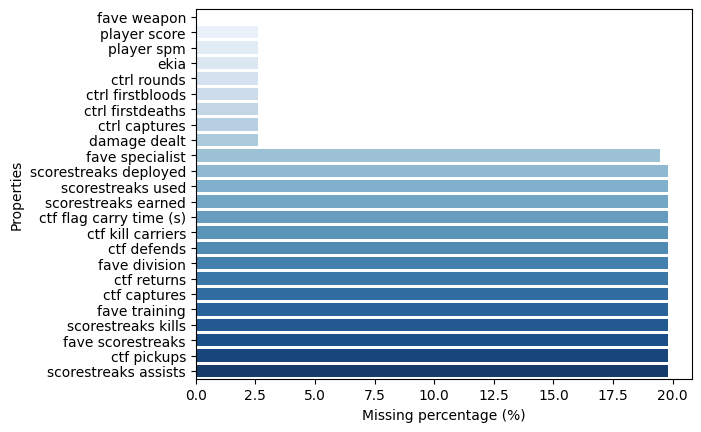

In [7]:
plot_missing(cod_data)

## Player Kill & Death Counts (7)

[Text(0.5, 1.0, 'Player Death Histogram')]

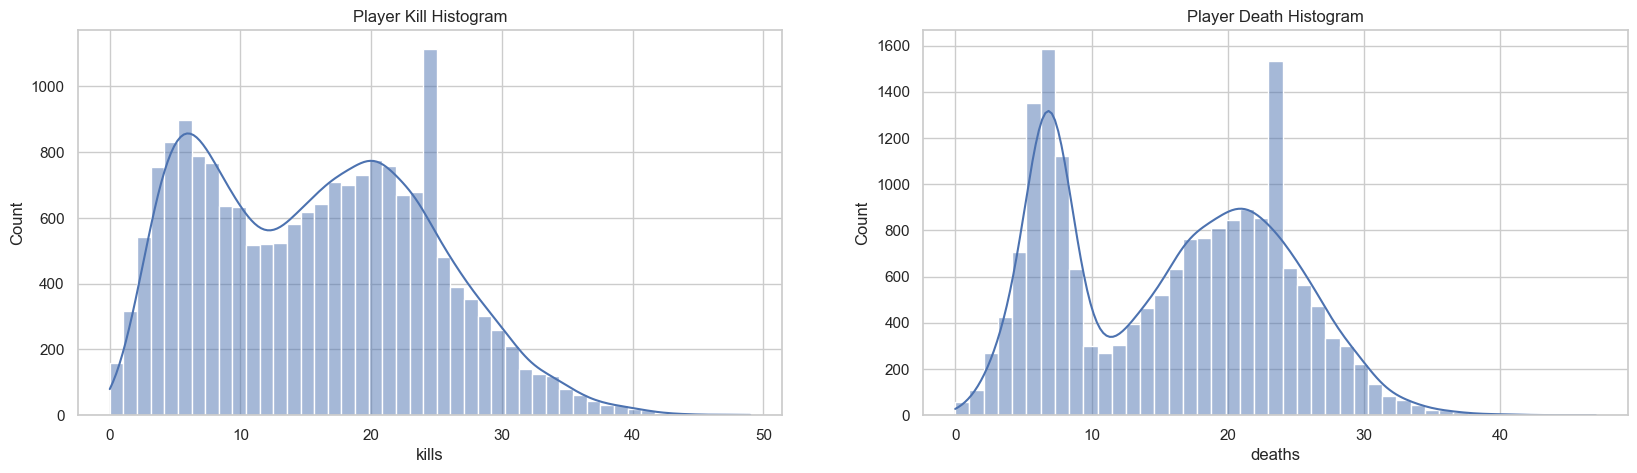

In [11]:
# Player Kill & Death Counts (Page 7)
sns.set(style = "whitegrid", palette = "deep")
fig_01 = plt.figure(figsize = (20,5))
subfig_1 = fig_01.add_subplot(1,2,1)
sns.histplot(cod_data['kills'], kde = True).set(title = "Player Kill Histogram")
subfig_2 = fig_01.add_subplot(1,2,2)

sns.set(style = "whitegrid", palette = "deep", rc={'figure.figsize':(10,10)})
sns.histplot(cod_data['deaths'], kde = True).set(title = "Player Death Histogram")

## Player Score Distribution (8)

[Text(0.5, 1.0, 'Player Score Histogram')]

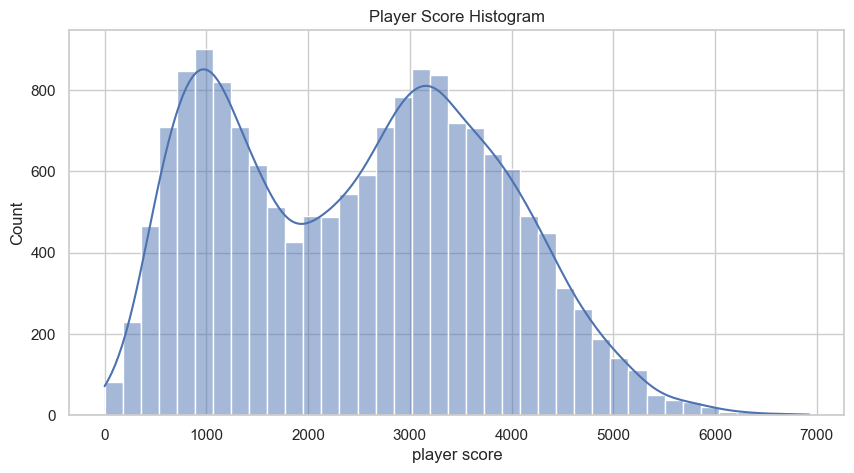

In [14]:
sns.set(style = "whitegrid", palette = "deep")
fig_01 = plt.figure(figsize = (10,5))
sns.histplot(cod_data['player score'], kde = True).set(title = "Player Score Histogram")

## Headshot Kills vs Kill-Death (9)

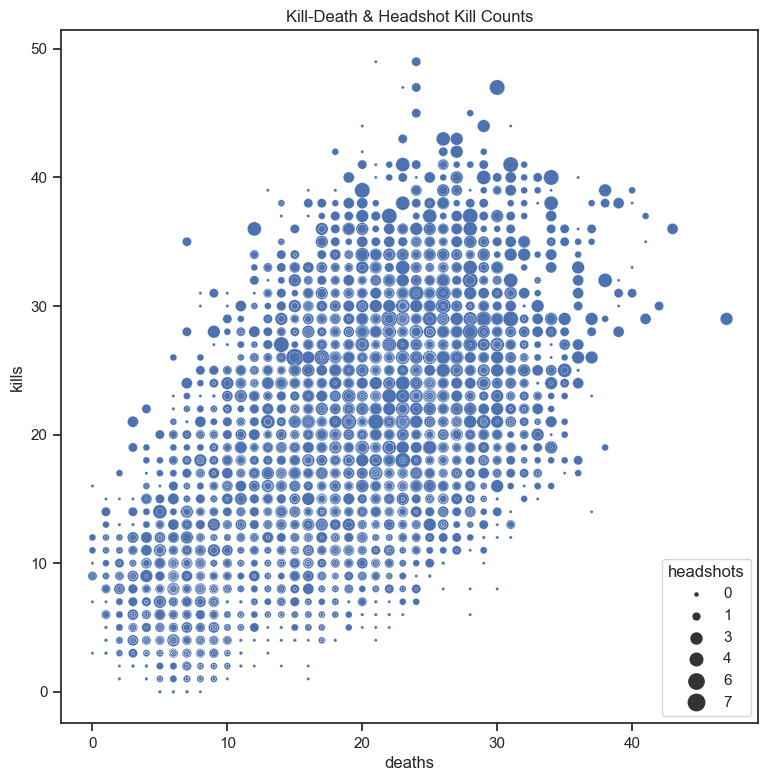

In [42]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
hk = sns.scatterplot(x=cod_data['deaths'],y=cod_data['kills'],size=cod_data['headshots'], sizes=(5,160)).set(title='Kill-Death & Headshot Kill Counts')
plt.legend(title='headshots', loc='lower right')
#plt.savefig("kdheadshots.png")

## Scorestreak Kills vs Kill-Death Counts (10)

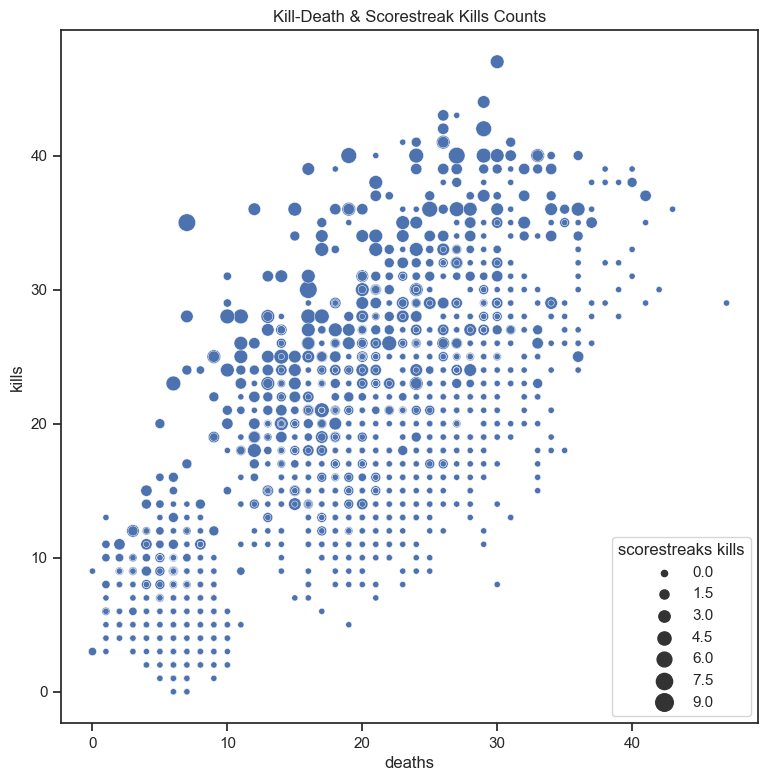

In [43]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
sns.scatterplot(x=cod_data['deaths'],y=cod_data['kills'],size=cod_data['scorestreaks kills'], sizes = (20,160)).set(title='Kill-Death & Scorestreak Kills Counts')
plt.legend(title='scorestreaks kills', loc='lower right')

## Overall (K/D) Distribution (12)

[Text(0.5, 1.0, 'Player K/D Ratio Distribution')]

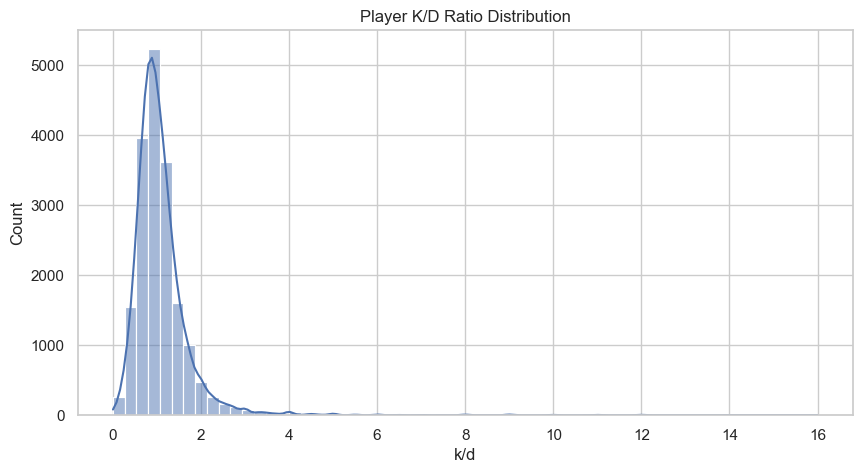

In [44]:
sns.set(style = "whitegrid", palette = "deep", rc={'figure.figsize':(10,5)})
sns.histplot(cod_data['k/d'], kde = True, bins = 60).set(title = "Player K/D Ratio Distribution")

## Headshot & Scorestreak Revisited (13)

[Text(0.5, 1.0, 'K/D Ratio vs Headshot Kills')]

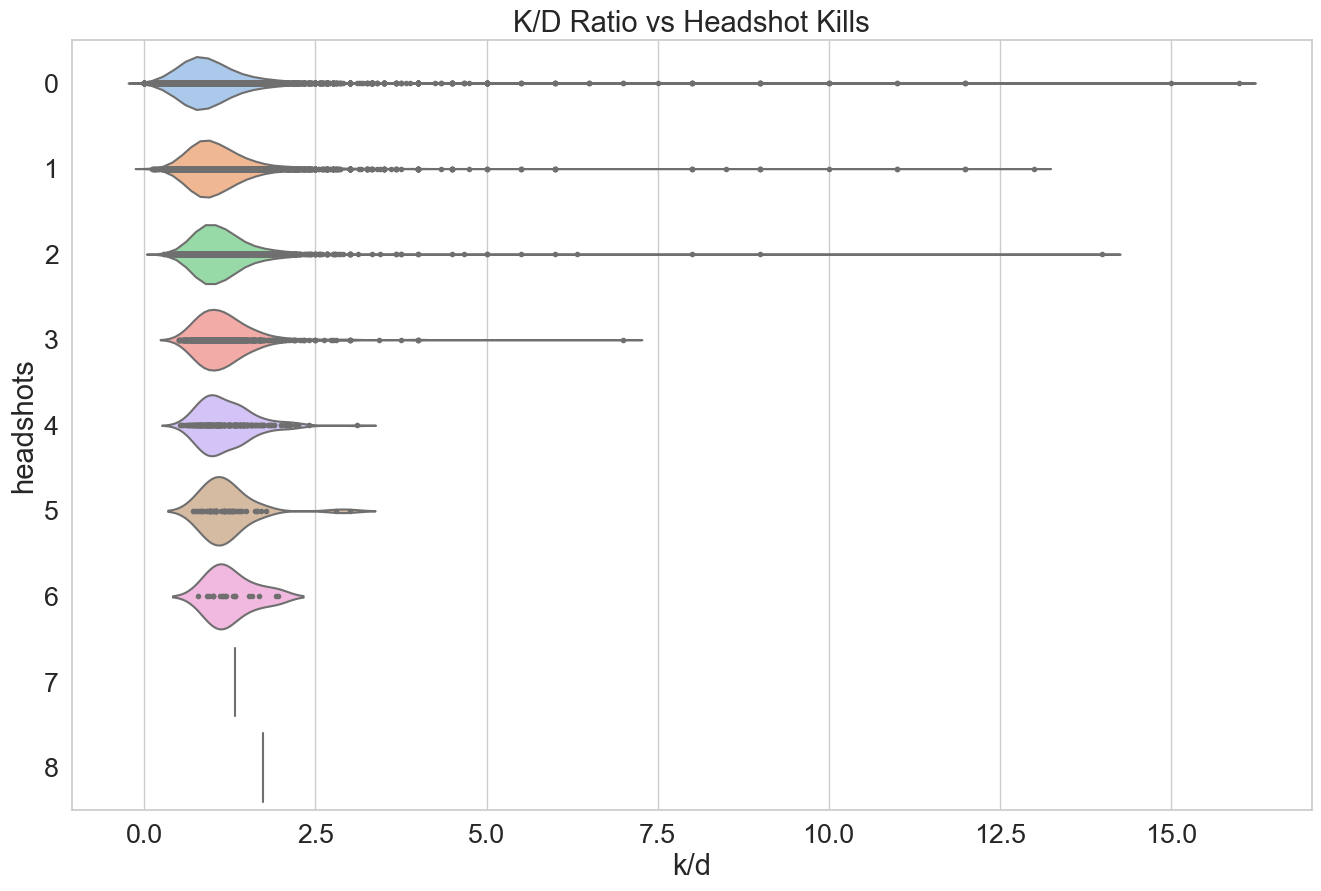

In [47]:
sns.set(style="whitegrid", rc={'figure.figsize':(16,10)}, font_scale=1.75)
sns.violinplot(x=cod_data['k/d'], y=cod_data['headshots'], inner="points", orient="h", scale = "area", width=0.8, palette="pastel").set(title = "K/D Ratio vs Headshot Kills")

[Text(0.5, 1.0, 'K/D Ratio vs Scorestreak Kills')]

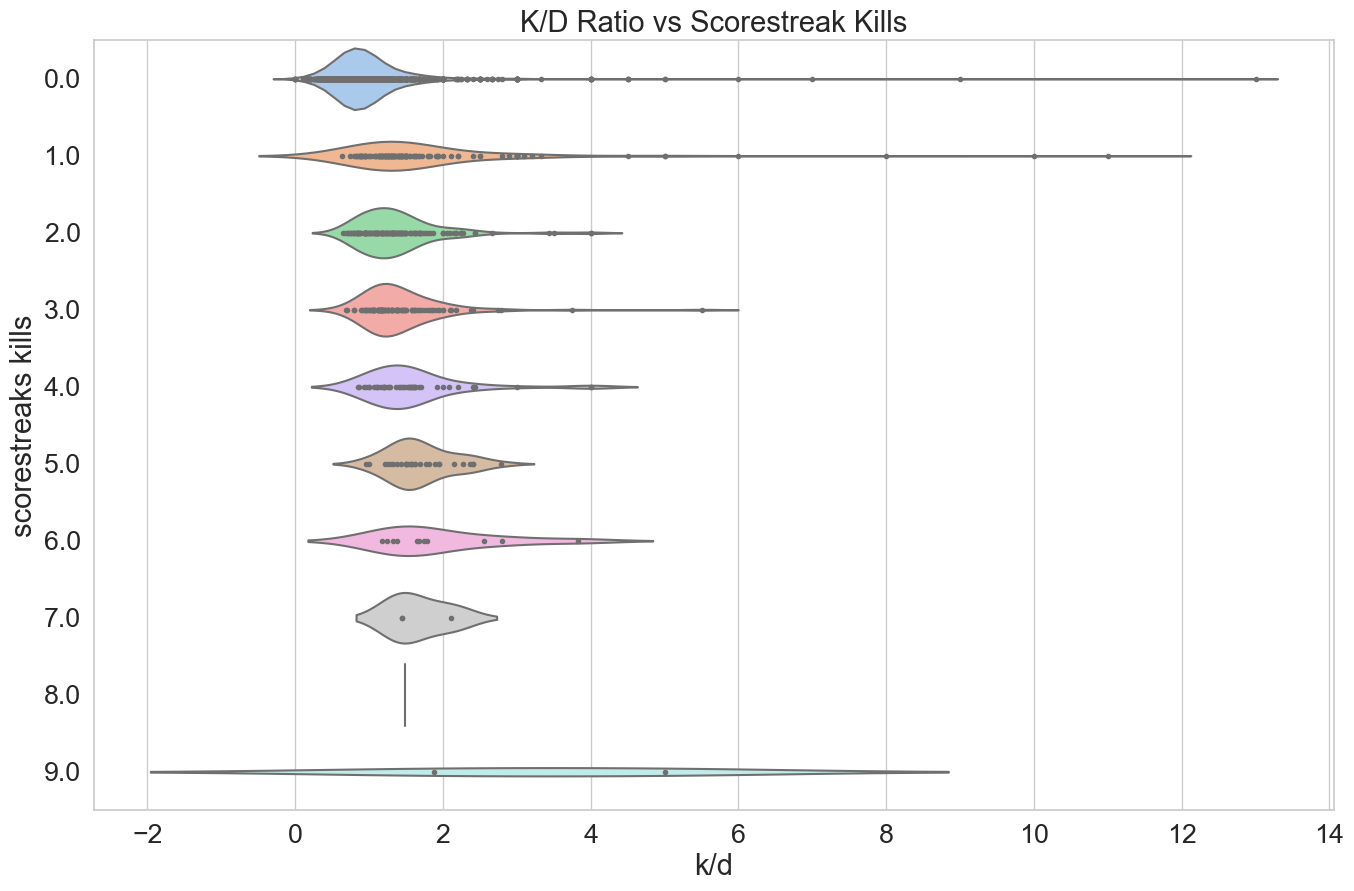

In [48]:
sns.set(style="whitegrid", rc={'figure.figsize':(16,10)}, font_scale=1.75)
sns.violinplot(x=cod_data['k/d'], y=cod_data['scorestreaks kills'], inner="points", orient="h", scale = "area", width=0.8, palette="pastel").set(title = "K/D Ratio vs Scorestreak Kills")

## Player Score vs K/D (14)

[Text(0.5, 1.0, 'K/D Ratio vs Player Score')]

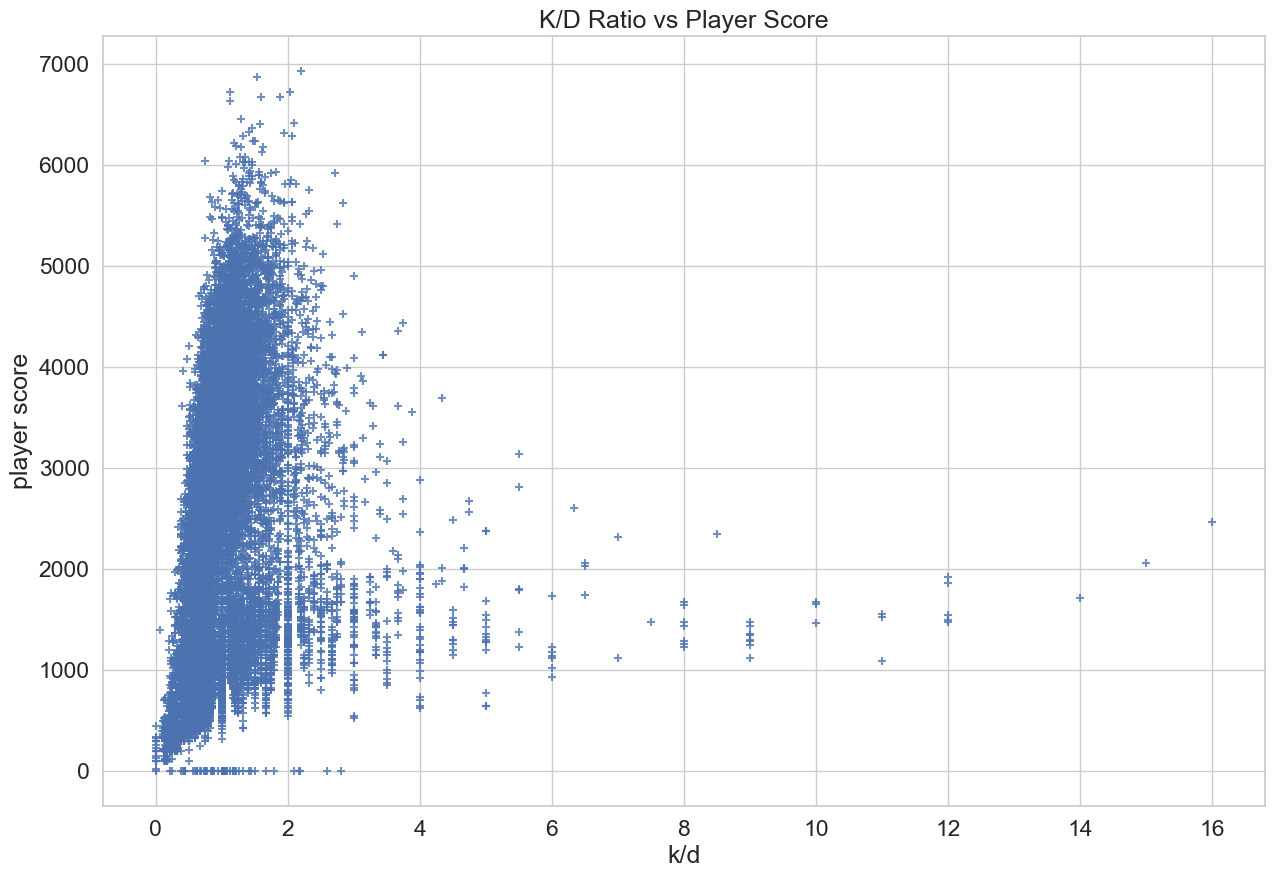

In [49]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,10)}, font_scale=1.5)
sns.regplot(x=cod_data['k/d'],y=cod_data['player score'], marker="+", fit_reg=False).set(title = "K/D Ratio vs Player Score")

## Most Common Weapons Used (15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maddox RFB'),
  Text(1, 0, 'Saug 9mm'),
  Text(2, 0, 'ICR-7'),
  Text(3, 0, 'PPSh-41'),
  Text(4, 0, 'FG 42'),
  Text(5, 0, 'Paladin HB50'),
  Text(6, 0, 'KN-57'),
  Text(7, 0, 'Kar98k'),
  Text(8, 0, 'Rampart 17'),
  Text(9, 0, 'SwordFish'),
  Text(10, 0, 'BAR'),
  Text(11, 0, 'Spitfire'),
  Text(12, 0, 'GKS'),
  Text(13, 0, 'Grav'),
  Text(14, 0, 'Auger DMR'),
  Text(15, 0, 'Outlaw 308')])

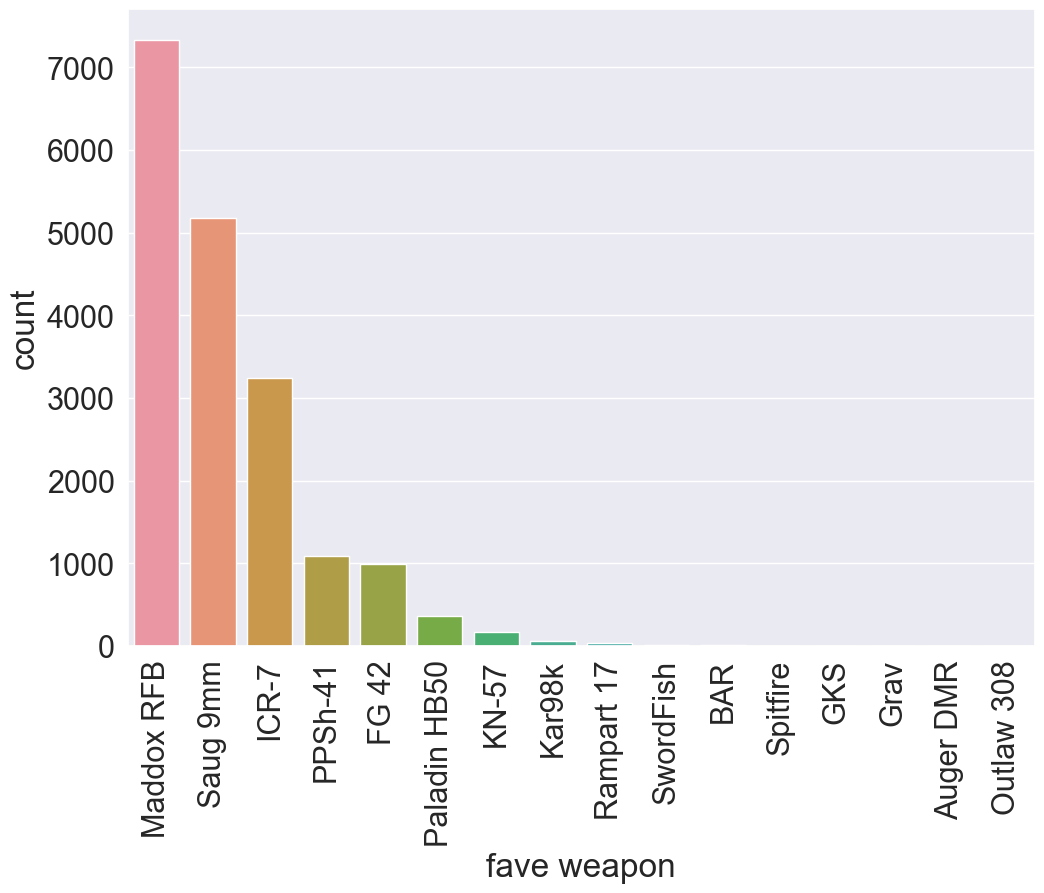

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.countplot(x=cod_data['fave weapon'], order = cod_data['fave weapon'].value_counts().index)
plt.xticks(rotation=90)

## Top 8 Most Used Weapons Compared (16)

C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\326514890.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills per 10min'],hist=False, label='Maddox RFB')
C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\326514890.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

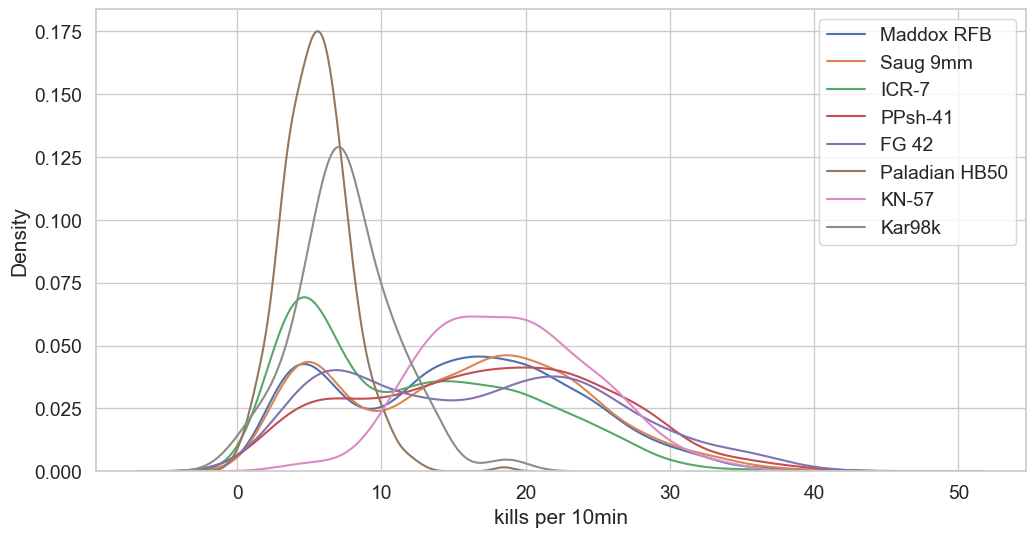

In [52]:
sns.set(style = "whitegrid", font_scale=1.25, rc={'figure.figsize':(12,6)})
sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills per 10min'],hist=False, label='Maddox RFB')
sns.distplot(cod_data[cod_data['fave weapon']=='Saug 9mm']['kills per 10min'],hist=False, label='Saug 9mm')
sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills per 10min'],hist=False, label='ICR-7')
sns.distplot(cod_data[cod_data['fave weapon']=='PPSh-41']['kills per 10min'],hist=False, label='PPsh-41')
sns.distplot(cod_data[cod_data['fave weapon']=='FG 42']['kills per 10min'],hist=False, label='FG 42')
sns.distplot(cod_data[cod_data['fave weapon']=='Paladin HB50']['kills per 10min'],hist=False, label='Paladian HB50')
sns.distplot(cod_data[cod_data['fave weapon']=='KN-57']['kills per 10min'],hist=False, label='KN-57')
sns.distplot(cod_data[cod_data['fave weapon']=='Kar98k']['kills per 10min'],hist=False, label='Kar98k')
plt.legend()

## Weapons Exhibiting Similar Distributions (17)

C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\1365727956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills per 10min'],hist=False, label='Maddox RFB')
C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\1365727956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

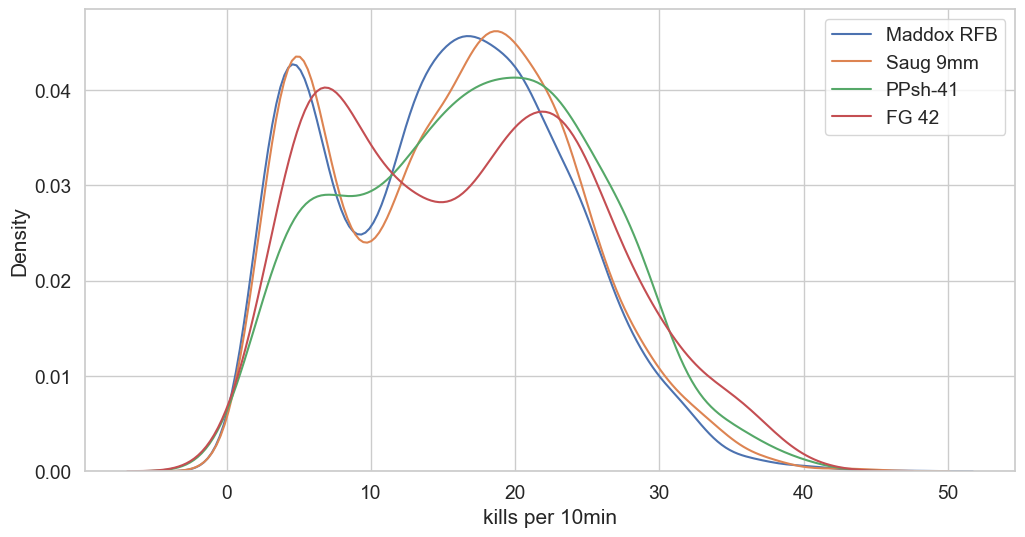

In [53]:
sns.set(style = "whitegrid", font_scale=1.25, rc={'figure.figsize':(12,6)})
sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills per 10min'],hist=False, label='Maddox RFB')
sns.distplot(cod_data[cod_data['fave weapon']=='Saug 9mm']['kills per 10min'],hist=False, label='Saug 9mm')
sns.distplot(cod_data[cod_data['fave weapon']=='PPSh-41']['kills per 10min'],hist=False, label='PPsh-41')
sns.distplot(cod_data[cod_data['fave weapon']=='FG 42']['kills per 10min'],hist=False, label='FG 42')
plt.legend()

## Weapons Displaying Different Trends(18)

C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\2147676913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills per 10min'],hist=False, label='ICR-7')
C:\Users\cay10\AppData\Local\Temp\ipykernel_3744\2147676913.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

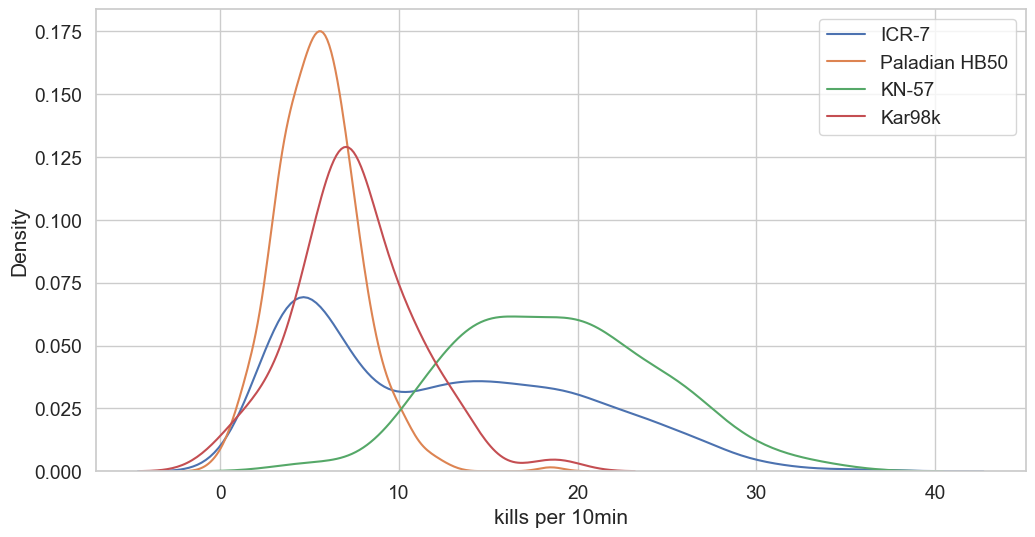

In [54]:
sns.set(style = "whitegrid", font_scale=1.25, rc={'figure.figsize':(12,6)})
sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills per 10min'],hist=False, label='ICR-7')
sns.distplot(cod_data[cod_data['fave weapon']=='Paladin HB50']['kills per 10min'],hist=False, label='Paladian HB50')
sns.distplot(cod_data[cod_data['fave weapon']=='KN-57']['kills per 10min'],hist=False, label='KN-57')
sns.distplot(cod_data[cod_data['fave weapon']=='Kar98k']['kills per 10min'],hist=False, label='Kar98k')
plt.legend()

### Helper method to plot heatmaps to display relationships between labels

In [55]:
def plot_heatmap(df, x, y, norm='columns', annot=True, cmap='Blues'):
    """Plot heatmap of two properties.

    Args:
        df (pd.DataFrame): input dataset.
        x (str): property on x axis.
        y (str): property on y axis.
        norm (str, optional): normalization mode for pd.crosstab (‘all’, ‘index’, ‘columns’). Defaults to 'columns'.
        annot (bool, optional): Annotating values or not. Defaults to True.
        cmap (str, optional): colormap for sns.heatmap. Defaults to 'Blues'.
    """
    assert isinstance(df, pd.DataFrame)
    assert isinstance(x, str)
    assert isinstance(y, str)
    assert isinstance(norm, str) and (norm=='all' or norm=='index' or norm=='columns')
    assert isinstance(annot, bool)
    assert isinstance(cmap, str)

    sns.heatmap(pd.crosstab(df[y], df[x], normalize=norm), annot=annot, cmap=cmap)

    return

## Weapon Popularity vs Game Mode (19)

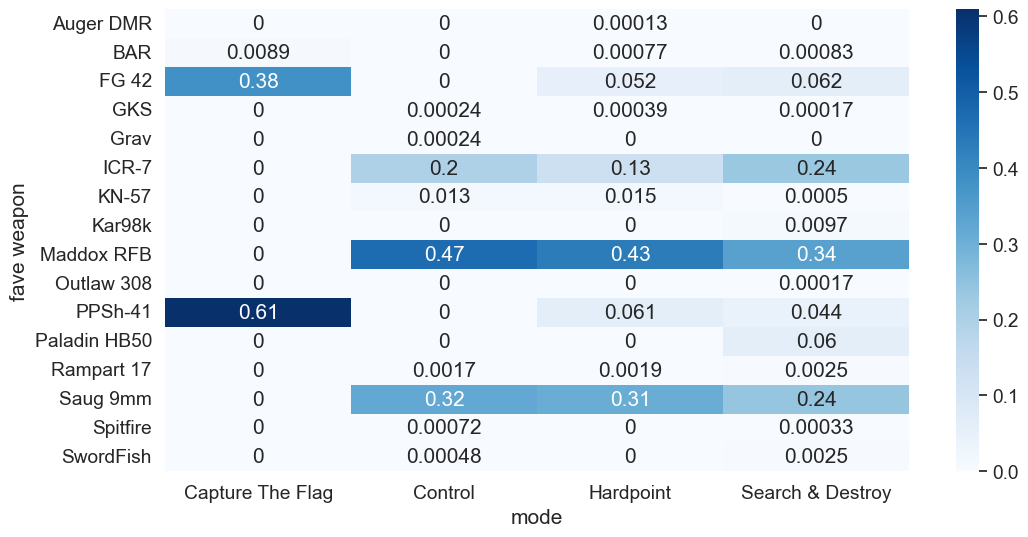

In [56]:
plot_heatmap(cod_data, 'mode', 'fave weapon')

## Weapon Popularity vs Specialists (20)

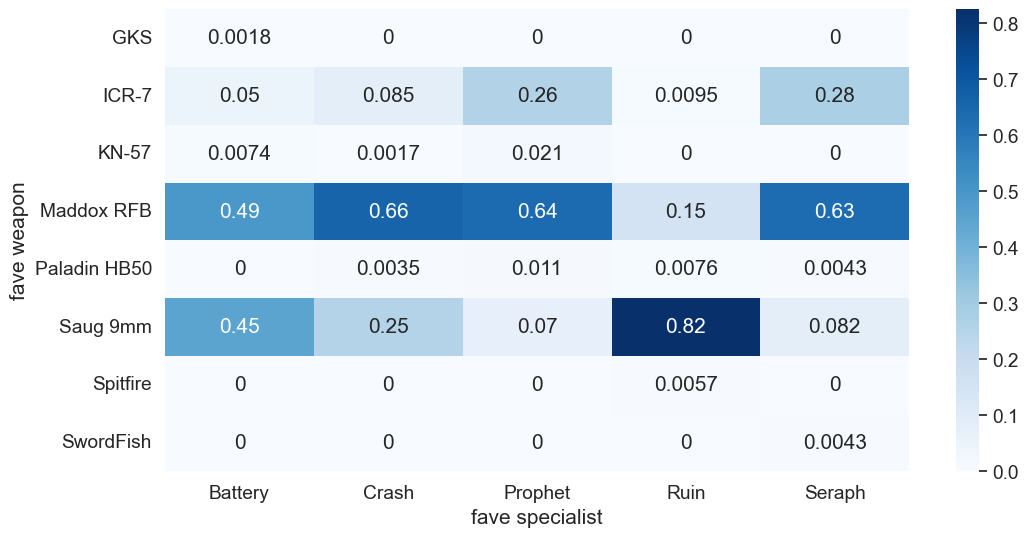

In [57]:
plot_heatmap(cod_data, 'fave specialist', 'fave weapon')